### Assessment Cover Page

Student Full Name: Choijamts Bayartai

Student Number: 2024150

Module Title: Statistical Techniques for Data Analysis

Assessment Title: CA1 Project

Assessment Due Date: 20-Mar-2024

Date of Submission:  21-Apr-2024

# Task 1 - Data Analysis

Dataset is about movies insdustry.
People love watching movies, and they're a popular kind of entertainment across the globe. But what elements play a role in a film's success? Is it the release date, the genre, the rating, or the budget?to be aware that I want to examine a dataset of films in an effort to pinpoint some of the elements that contribute to their popularity. I'll examine the typical movie budget throughout time, the most popular movie rating system, the highest and lowest average rating categories, and the correlation between the box office receipts and the date of release.

### importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

### importing the dataset to Pandas DataFrame: df

In [154]:
df = pd.read_csv("movies.csv")

In [155]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [156]:
df.shape

(7668, 15)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [198]:
df.describe()

year        score         votes        budget         gross  \
count  5421.000000  5421.000000  5.421000e+03  5.421000e+03  5.421000e+03   
mean   2001.661317     6.392455  1.150661e+05  3.600917e+07  1.032297e+08   
std      10.540908     0.962730  1.844073e+05  4.157337e+07  1.873027e+08   
min    1980.000000     1.900000  1.950000e+02  6.000000e+03  3.090000e+02   
25%    1993.000000     5.800000  1.900000e+04  1.000000e+07  1.073640e+07   
50%    2002.000000     6.500000  5.200000e+04  2.180000e+07  3.686941e+07   
75%    2011.000000     7.100000  1.290000e+05  4.500000e+07  1.124625e+08   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  5421.000000  
mean    108.152739  
std      18.115698  
min      63.000000  
25%      95.000000  
50%     105.000000  
75%     118.000000  
max     271.000000

The DataFrame's describe() function yields the fundamental statistics for each of its number columns. For numeric columns, the describe() function yields the following preconfigured statistics: count, mean, std, min, 25%, 50%, 75%, max.

In [199]:
df.describe(include ="object")

name rating   genre                         released     director  \
count       5421   5421    5421                             5421         5421   
unique      5336     10      15                             2560         2063   
top     Hercules      R  Comedy  August 26, 2016 (United States)  Woody Allen   
freq           3   2597    1496                                7           33   

             writer          star        country             company  
count          5421          5421           5421                5421  
unique         3205          1845             50                1475  
top     Woody Allen  Nicolas Cage  United States  Universal Pictures  
freq             32            40           4319                 330

In [159]:
for col in ['name', 'rating','genre','released','director','writer','star','country','company']:
    print(df[col].value_counts())

name
Nobody's Fool            3
Hercules                 3
Anna                     3
Hamlet                   3
Fever Pitch              3
                        ..
The Road to Wellville    1
The Cowboy Way           1
Blue Chips               1
Eat Drink Man Woman      1
Tee em el                1
Name: count, Length: 7512, dtype: int64
rating
R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: count, dtype: int64
genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: count, dtype: int64
released
February 14, 1986 (United 

### Handling the null and missing value

In [160]:
print(df.isnull().sum())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [180]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [181]:
df.dropna(inplace=True)

In [182]:
print(df.isnull().sum())

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


In [183]:
df.shape

(5421, 15)

/Users/oyundelger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


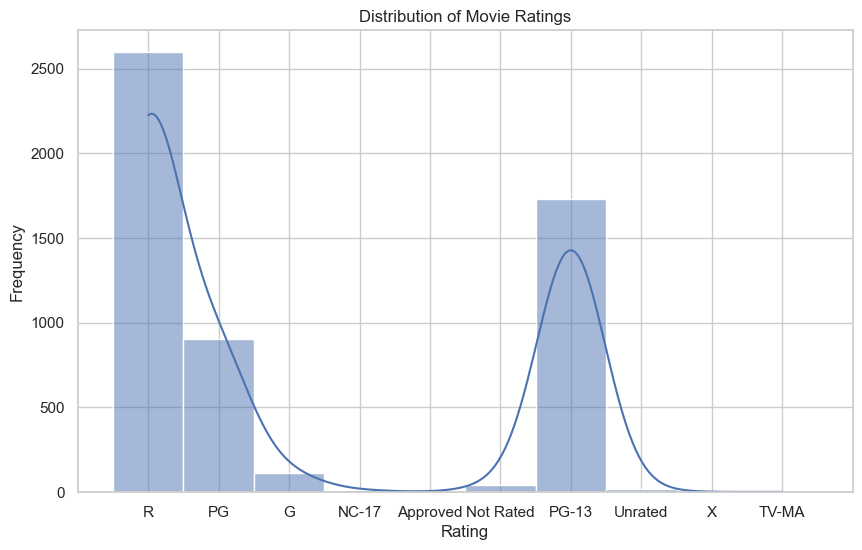

In [200]:

# Histogram of a numerical variable
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [142]:
numeric_df = df.select_dtypes(include=[np.number])

# Now compute the correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
# Use seaborn to create a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

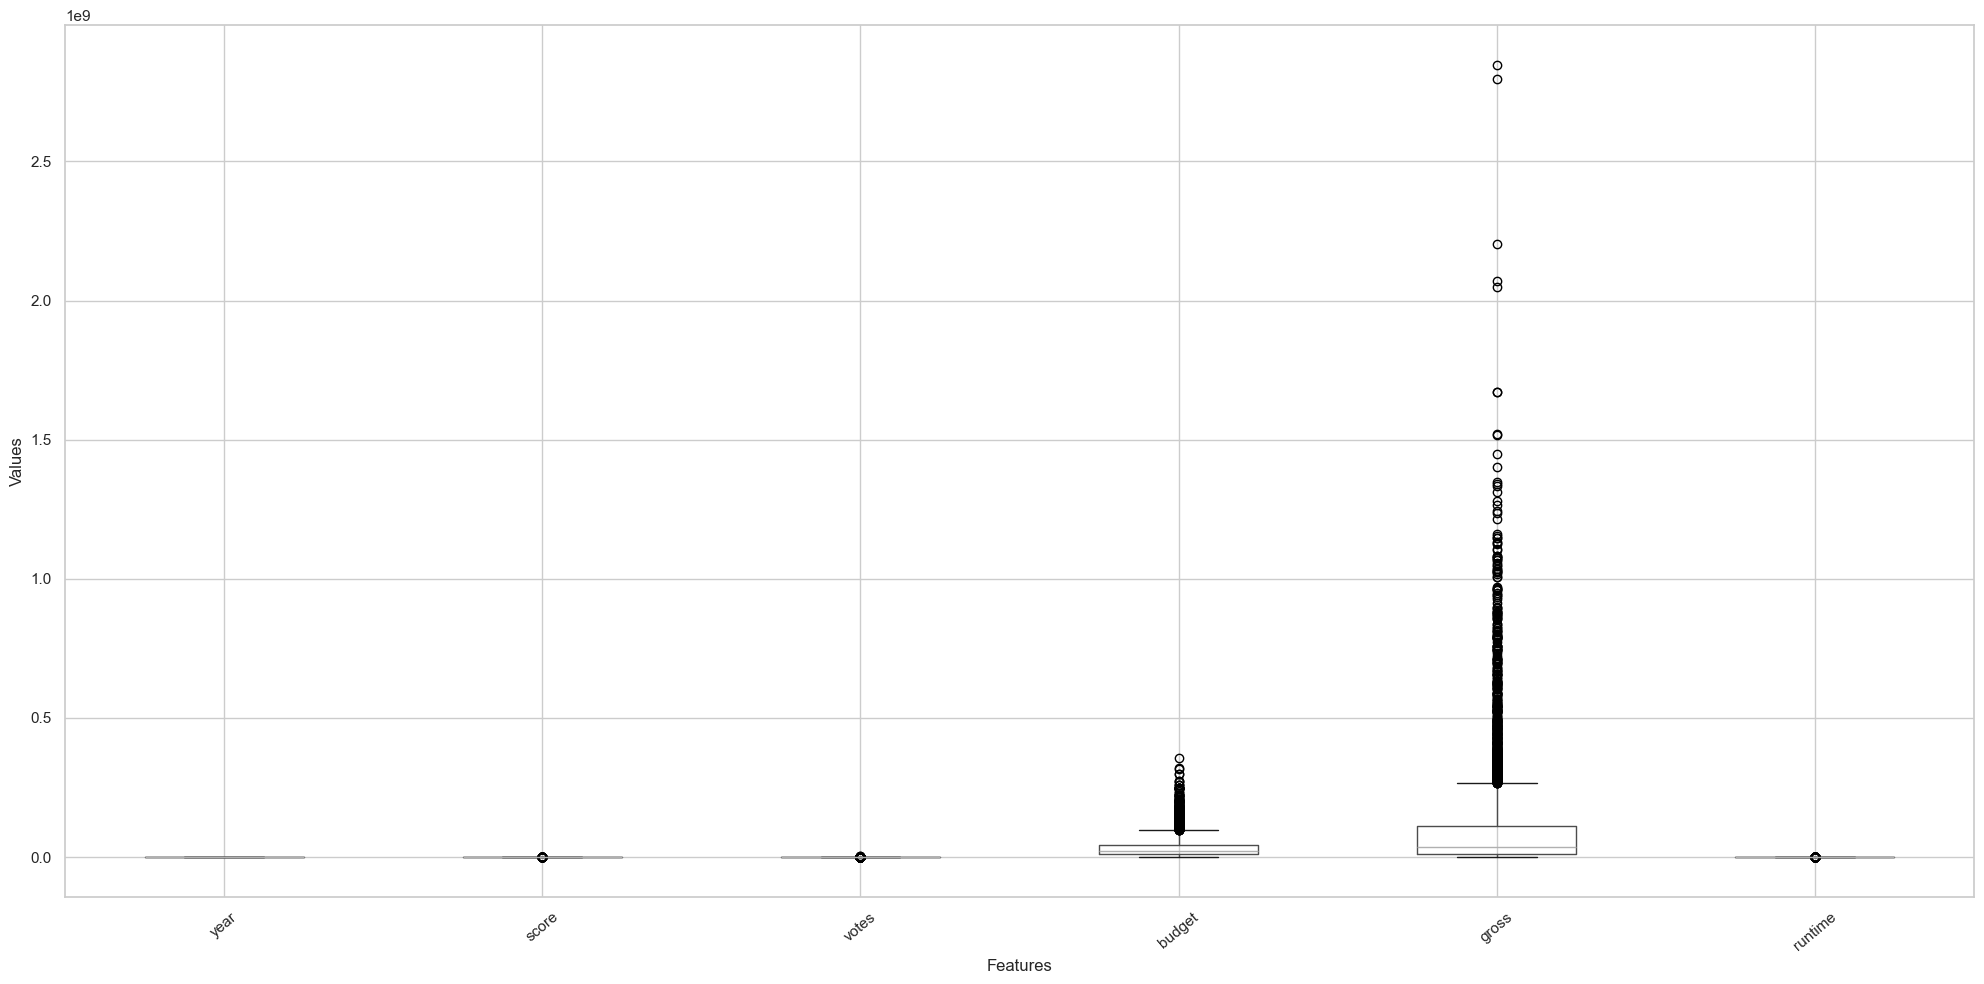

In [168]:
plt.figure(figsize=(20, 10))
boxplot = df.boxplot(vert=True)
plt.xticks(rotation=40)
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout() 
plt.show()

### The purpose of the function remove_outliers is to use the Interquartile Range (IQR) approach to eliminate outliers from a DataFrame based on the values in a designated column.

In [174]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to remove outliers from 'budget' and 'gross'
df_clean = remove_outliers(df, 'budget')
df_clean = remove_outliers(df_clean, 'gross')

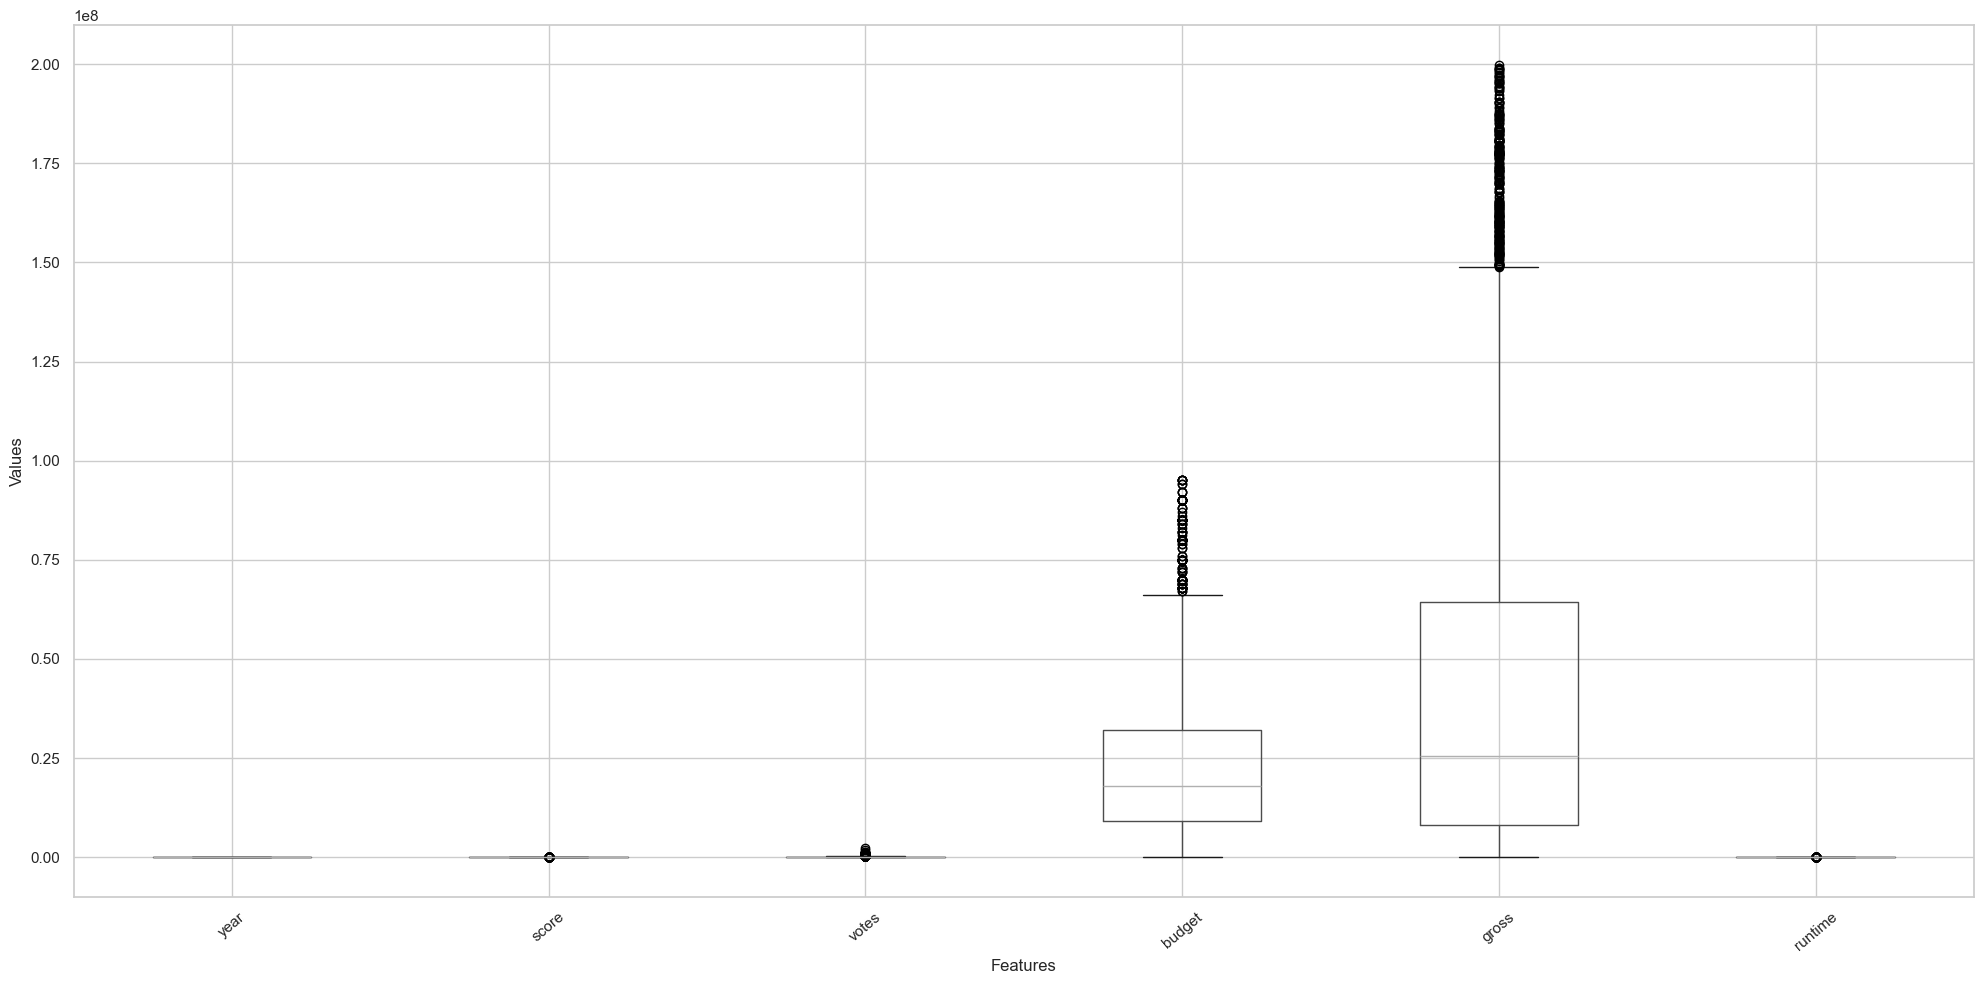

In [175]:
# Visualize the cleaned data
plt.figure(figsize=(20, 10))
df_clean.boxplot(vert=True)
plt.xticks(rotation=40)
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

defining the columns' data type

In [279]:
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['score'] = df['score'].astype('int64')

In [280]:
df.dtypes

name        object
rating      object
genre       object
year         int64
released    object
score        int64
votes        int64
director    object
writer      object
star        object
country     object
budget       int64
gross        int64
company     object
runtime      int64
dtype: object

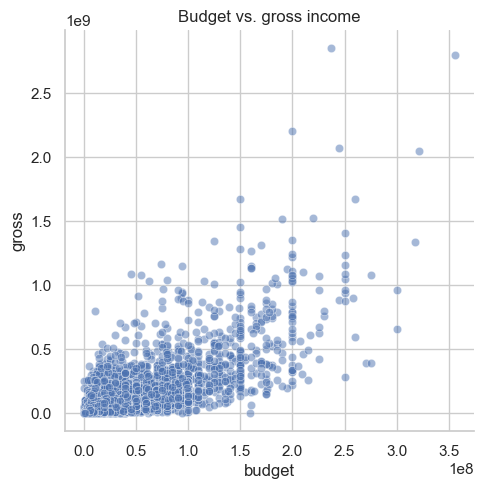

In [281]:
sns.relplot(data=df, x='budget', y='gross', alpha=0.5)
plt.title("Budget vs. gross income");

The scatter plot demonstrates a positive correlation between budget and gross, indicating that a rise in budget usually comes followed by an increase in gross.

Text(0, 0.5, 'Gross revenue')

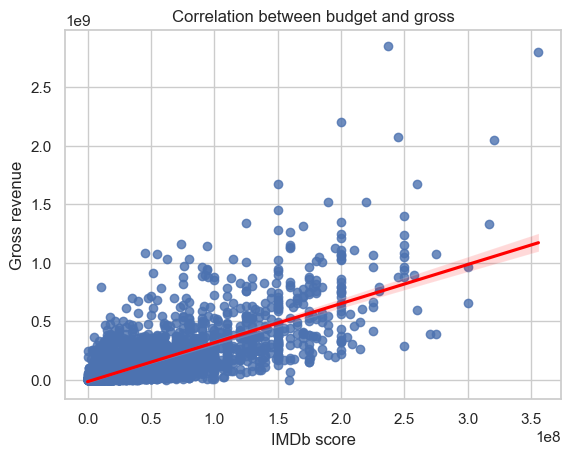

In [287]:
sns.regplot(x='budget',y='gross',data=df,line_kws={'color' : 'red'})
plt.title('Correlation between budget and gross')
plt.xlabel('IMDb score')
plt.ylabel('Gross revenue')

# Task 2 - Probability (Discrete):

## 1.What is the probability of rolling exactly two 6s in five rolls of a fair die?

We roll a fair six-sided die five times and we want to find the probability that exactly two of these five rolls result in a 6.In this case we use Binomal probability formula . The number of successes in a certain number of independent trials, each with an equal chance of success, is described by the binomial distribution.

"n" is the number of trials
"k" is the number of successful trials
"p"is the probability of success on a single trial
( 
k
n
​
 ) is a binomial coefficient

Number of trials "n" is 5 (because there are five rolls of the die)                          
Number of successes "k" is 2 (exactly two rolls that are 6's are what we are interested in)  
Probability of success "p": 6 in power of 1(since a fair die has one 6 out of six possible outcomes)  
Probability of failure "q": 6 in power of 5(since there are five outcomes that are not 6)


Therefore, if a fair six-sided dice is rolled five times, there are 7776 potential results.

In [219]:
from math import comb

n = 5
k = 2  
p = 1/6  
q = 5/6  

probability = comb(n, k) * (p ** k) * (q ** (n - k))

print("Two 6's in five rolls probability is:", probability)


Two 6's in five rolls probability is: 0.1607510288065844


## 2.The number of industrial injuries on average per working week in a factory is 0.75.
### Assuming that the distribution of injuries follows a Poisson distribution, find the probabilitythat in a particular week there will be no more than two accidents.

If the number of events (in this task, injuries) occurs at a known average rate and is independent of the time elapsed since the last incident, then the Poisson distribution is perfect for simulating the number of events in a given span of time or space. This area has an average weekly injury rate of 0.75.

This case we can use the formula for the Poisson probability

λ(lambda) is The average weekly injury rate is 0.75.

k is the number of injuries  (2)

e is represents the natural logarithm's 2.71828.


k! is k times the factorial

In [261]:
import math

k = 2  
lambda_ = 0.75  
factorial_k = math.factorial(k)
p = (math.exp(-lambda_) * (lambda_ ** k)) / factorial_k

p_percentage = p * 100
print(f"P(X={k}) = {p:.4f} Percentage of probability {p_percentage:.2f}%")


P(X=2) = 0.1329 Percentage of probability 13.29%


# Task 3 - Probability (Continuous)

### The time a person spends at Dublin Zoo is Normally distributed with a mean of 90 minutes and a standard deviation of 10 minutes.

### Using this distribution, answer the following:


• If a visitor is selected at random, find the probability that they will spend at most 85
minutes visiting the zoo.

in this case we use normal distribution 

1. First we calculate the Z-Score


Mean is (μ) = 90 minutes

Standard deviation is (σ) = 10 minutes

Time is (X) = 85 minutes

Let's calculate it: 85 - 90 / 10 = -0.5

85 minutes is half a standard deviation shorter than the average visit time, according to this Z-score.

A z-score of -0.5 is related with 0.3085. That means there is a 30.85%, that a visitor will spend a maximum of 85 minutes in the zoo.

In [263]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mean = 90
std = 10 
time = 85

x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
pdf = norm.pdf(x, mean, std_dev)

In [264]:
plt.fill_between(x, pdf, where=(x <= time), color='skyblue', alpha=0.5, label='85 minutes visiting the zoo')
plt.fill_between(x, pdf, where=(x > time), color='blue', label='others')
plt.title('Visit Time Distribution at Dublin Zoo')
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.legend()
plt.show()

• If a visitor is selected at random, find the probability that they will spend at least 100 minutes visiting the zoo

we used same formula like first task 

In [255]:
from scipy.stats import norm

mean = 90
std_dev = 10
target_time = 100

probability_up_to_100 = norm.cdf(target_time, mean, std_dev)

probability_at_least_100 = 1 - probability_up_to_100

print("Probability of spending at least 100 minutes at the zoo:", probability_at_least_100)


Probability of spending at least 100 minutes at the zoo: 0.15865525393145707


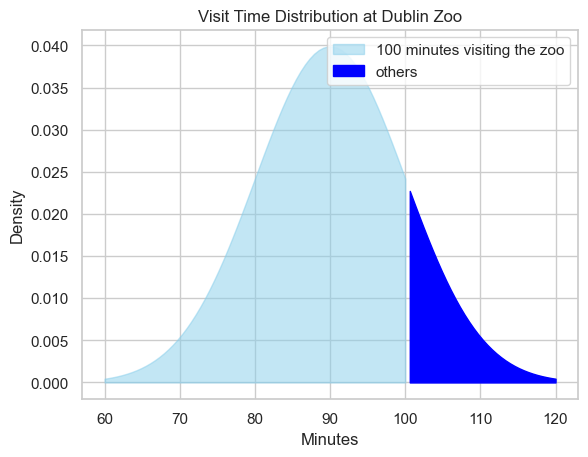

In [257]:
plt.fill_between(x, pdf, where=(x <= target_time), color='skyblue', alpha=0.5, label='100 minutes visiting the zoo')
plt.fill_between(x, pdf, where=(x > target_time), color='blue', label='others')
plt.title('Visit Time Distribution at Dublin Zoo')
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.legend()
plt.show()

• Given that you know that a particular visitor has spent longer than average visiting the Zoo,
what is the probability that they have spent more than 100 minutes there?

In [275]:
from scipy.stats import norm

mean = 85
std_dev = 10

more_than_100 = 1 - norm.cdf(100, mean, std_dev)

less_than_100 = 1 - norm.cdf(85, mean, std_dev)

result = more_than_100 + less_than_100

print("Probability that a visitor spends more than 100 minutes, people who already spent more than 85 minutes:", conditional_probability)


Probability that a visitor spends more than 100 minutes, people who already spent more than 85 minutes: 0.5668072012688581
